In [1]:
# TODO Tiffany - education and malnutrition
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

In [13]:
# Init Data

def init_data(csv):
    if "education" in csv:
        education = pd.read_csv(csv, skiprows=4)
        return education
        # education.head()
    if "GDP" in csv:
        gdp = pd.read_csv(csv, skiprows=4)
        return gdp
    if "malnutrition" in csv:
        malnutrition = pd.read_csv(csv, skiprows=4)
        return malnutrition
    if "poverty" in csv:
        poverty = pd.read_csv(csv, skiprows=4)
        return poverty
    if "swine" in csv:
        swine_flu = pd.read_csv(csv)
        return swine_flu
    if "covid" in csv:
        covid = pd.read_csv(csv)
        return covid
    if "hiv_aids" in csv:
        hiv_aids = pd.read_csv(csv)
        return hiv_aids


def wb_clean(raw):
    # reading in data
    # world_bank_data = os.path.expanduser('../data/world_bank_data/' + raw)
    wb = init_data(os.path.expanduser('data/world_bank_data/' + raw))
    wb["Country"] = wb["Country Name"]
    wb = wb.drop(["Country Name"], axis=1).reindex()

    # fixing columns
    cols = list(wb.columns.values)
    cols.pop(cols.index("Country"))
    wb = wb[["Country"] + cols]
    wb["mean"] = wb.mean(axis=1)

    return wb

# Swine Epidemic

In [4]:
# print(education)
swine_full_path = os.path.expanduser('data/swine_flu/swine_flu_data.csv')
swine = init_data(swine_full_path)
#sort
swine = swine.sort_values(by="Country")
# swine.head()
#drop the link column
swine = swine.drop(["Link"], axis=1)
# swine.head()
#add percent deaths
swine["Percent of Deaths"] = swine["Cumulative no. of deaths"] / swine["Cumulative no. of cases"]
swine = swine.groupby(["Country"]).sum().reset_index()

# Swine Epidemic plot cases and deaths

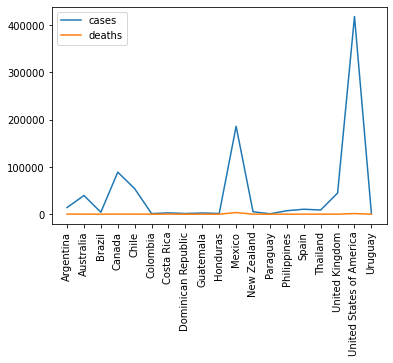

In [5]:

cases = []
deaths = []
country = []

for i in range(0, len(swine["Country"])):
    if swine["Cumulative no. of deaths"][i] > 0:
        # print('nope')
        country.append(swine["Country"][i])
        cases.append(swine["Cumulative no. of cases"][i])
        deaths.append(swine["Cumulative no. of deaths"][i])

country = sorted(country)

plt.xticks(rotation=90)
plt.plot(country, cases)
plt.plot(country, deaths)
plt.legend(["cases", "deaths"])
plt.show()

#plot countries
plt.plot(swine["Country"], swine["Percent of Deaths"])

# Swine Epidemic plot deaths

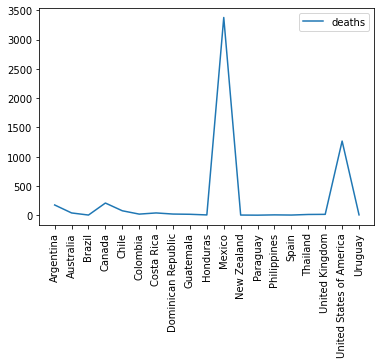

In [6]:
deaths = []
country = []

for i in range(0, len(swine["Country"])):
    if swine["Cumulative no. of deaths"][i] > 0:
        # print('nope')
        country.append(swine["Country"][i])
        deaths.append(swine["Cumulative no. of deaths"][i])

plt.xticks(rotation=90)
plt.plot(country, deaths)
plt.legend(["deaths"])
plt.show()

# clean education vs swine

C:\Users\tiz081\AppData\Local\Temp/ipykernel_10896/834511723.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wb["mean"] = wb.mean(axis=1)


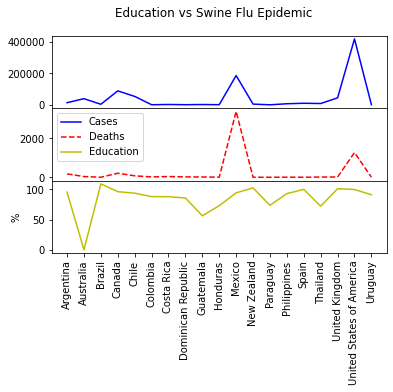

In [14]:
# script_dir = os.path.dirname(__file__)
education_csv = 'education.csv'
education = wb_clean(os.path.expanduser(education_csv))

drop = []
us = {"United States": "United States of America"}
education['Country'] = education['Country'].replace(us)
for idx, coun in enumerate(education["Country"]):
    if coun not in country:
        drop.append(idx)
    else:
        continue
keep = set(range(education.shape[0])) - set(drop)
swine_edu = education.take(list(keep))
# swine_edu = swine.merge(education, on = "Country", how = 'left')
swine_edu["mean"] = swine_edu["mean"].fillna(0)
swine_edu = swine_edu.sort_values("Country")

#EDUCATION VS SWINE
fig, axs = plt.subplots(3)
fig.suptitle("Education vs Swine Flu Epidemic")
line0, = axs[0].plot(country, cases, color='b', linestyle='-')
line1, = axs[1].plot(country, deaths, color='r', linestyle='--')
line2, = axs[2].plot(country, list(swine_edu["mean"]), color='y')
plt.xticks(rotation=90)
plt.setp(axs[0].get_xticklabels(), visible=False)
plt.setp(axs[1].get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)
axs[2].set_ylabel("%")
axs[1].legend((line0, line1, line2), ("Cases", "Deaths", "Education"), loc="upper left")
plt.show()

# GDP vs SWINE CLEAN

C:\Users\tiz081\AppData\Local\Temp/ipykernel_10896/834511723.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wb["mean"] = wb.mean(axis=1)


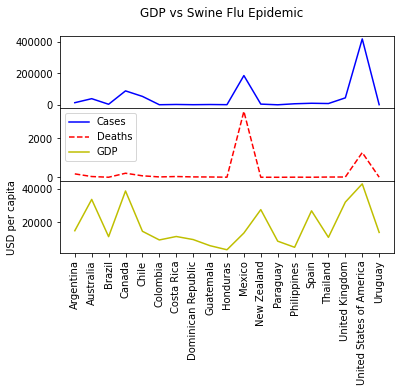

In [15]:
# script_dir = os.path.dirname(__file__)
gdp_csv = "GDP.csv"
gdp = wb_clean(os.path.expanduser(gdp_csv))

drop = []
us = {"United States": "United States of America"}
gdp['Country'] = gdp['Country'].replace(us)
for idx, coun in enumerate(gdp["Country"]):
    if coun not in country:
        drop.append(idx)
    else:
        continue
keep = set(range(gdp.shape[0])) - set(drop)
swine_gdp = gdp.take(list(keep))
# swine_edu = swine.merge(education, on = "Country", how = 'left')
swine_gdp["mean"] = swine_gdp["mean"].fillna(0)
swine_gdp = swine_gdp.sort_values("Country")

#GDP VS SWINE plot

fig, axs = plt.subplots(3)
fig.suptitle("GDP vs Swine Flu Epidemic")
line0, = axs[0].plot(country, cases, color='b', linestyle='-')
line1, = axs[1].plot(country, deaths, color='r', linestyle='--')
line2, = axs[2].plot(country, list(swine_gdp["mean"]), color='y')
plt.xticks(rotation=90)
plt.setp(axs[0].get_xticklabels(), visible=False)
plt.setp(axs[1].get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)
axs[2].set_ylabel("USD per capita")
axs[1].legend((line0, line1, line2), ("Cases", "Deaths", "GDP"), loc="upper left")
plt.show()

# malnutrition vs SWINE CLEAN

C:\Users\tiz081\AppData\Local\Temp/ipykernel_10896/834511723.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wb["mean"] = wb.mean(axis=1)


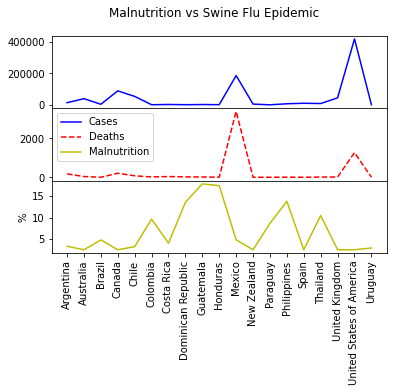

In [16]:
# script_dir = os.path.dirname(__file__)
mal_csv = "malnutrition.csv"
mal = wb_clean(os.path.expanduser(mal_csv))

drop = []
us = {"United States": "United States of America"}
mal['Country'] = mal['Country'].replace(us)
for idx, coun in enumerate(mal["Country"]):
    if coun not in country:
        drop.append(idx)
    else:
        continue
keep = set(range(mal.shape[0])) - set(drop)
swine_mal = mal.take(list(keep))
# swine_edu = swine.merge(education, on = "Country", how = 'left')
swine_mal["mean"] = swine_mal["mean"].fillna(0)
swine_mal = swine_mal.sort_values("Country")

#MALNUTRITION VS SWINE plot

fig, axs = plt.subplots(3)
fig.suptitle("Malnutrition vs Swine Flu Epidemic")
line0, = axs[0].plot(country, cases, color='b', linestyle='-')
line1, = axs[1].plot(country, deaths, color='r', linestyle='--')
line2, = axs[2].plot(country, list(swine_mal["mean"]), color='y')
plt.xticks(rotation=90)
plt.setp(axs[0].get_xticklabels(), visible=False)
plt.setp(axs[1].get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)
axs[2].set_ylabel("%")
axs[1].legend((line0, line1, line2), ("Cases", "Deaths", "Malnutrition"), loc="upper left")
plt.show()

# poverty vs SWINE CLEAN

C:\Users\tiz081\AppData\Local\Temp/ipykernel_10896/834511723.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wb["mean"] = wb.mean(axis=1)


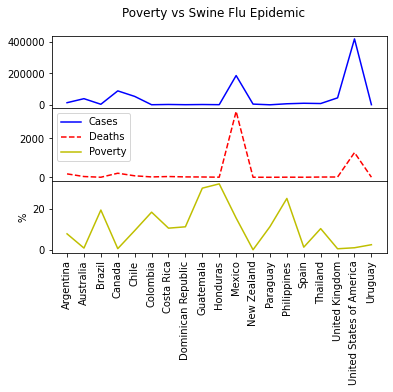

In [17]:
# script_dir = os.path.dirname(__file__)
pov_csv = "poverty.csv"
pov = wb_clean(os.path.expanduser(pov_csv))

drop = []
us = {"United States": "United States of America"}
pov['Country'] = pov['Country'].replace(us)
for idx, coun in enumerate(pov["Country"]):
    if coun not in country:
        drop.append(idx)
    else:
        continue
keep = set(range(pov.shape[0])) - set(drop)
swine_pov = pov.take(list(keep))
# swine_edu = swine.merge(education, on = "Country", how = 'left')
swine_pov["mean"] = swine_pov["mean"].fillna(0)
swine_pov = swine_pov.sort_values("Country")

#POVERTY VS SWINE plot

fig, axs = plt.subplots(3)
fig.suptitle("Poverty vs Swine Flu Epidemic")
line0, = axs[0].plot(country, cases, color='b', linestyle='-')
line1, = axs[1].plot(country, deaths, color='r', linestyle='--')
line2, = axs[2].plot(country, list(swine_pov["mean"]), color='y')
plt.xticks(rotation=90)
plt.setp(axs[0].get_xticklabels(), visible=False)
plt.setp(axs[1].get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)
axs[2].set_ylabel("%")
axs[1].legend((line0, line1, line2), ("Cases", "Deaths", "Poverty"), loc="upper left")
plt.show()

# Covid Pandemic

In [19]:
# print(education)
covid_full_path = os.path.expanduser('data/covid/full_grouped.csv')
covid = init_data(covid_full_path)
#sort
# covid = covid.sort_values(by = "Country")
# covid.head()
covid["Country"] = covid["Country/Region"]
covid["Total Cases"] = covid["Confirmed"] + covid["New cases"]
covid["Total Deaths"] = covid["Deaths"] + covid["New deaths"]
covid["Percent of Deaths"] = covid["Total Deaths"] / covid["Total Cases"]
#drop the link column
covid = covid.drop(["Country/Region"], axis=1)
covid = covid.drop(["Confirmed"], axis=1)
covid = covid.drop(["New cases"], axis=1)
covid = covid.drop(["Deaths"], axis=1)
covid = covid.drop(["New deaths"], axis=1)
covid = covid.groupby(["Country"]).sum().reset_index()
covid.head()

,Country,Recovered,Active,New recovered,Total Cases,Total Deaths,Percent of Deaths
0,Afghanistan,798240,1089052,25198,1972653,50367,3.378099
1,Albania,118877,72117,2745,201582,5852,4.801469
2,Algeria,755897,345886,18837,1207728,79135,11.523012
3,Andorra,69074,19907,803,95311,5475,7.025168
4,Angola,6573,15011,242,23612,1119,8.513762


# Covid Pandemic plot cases and deaths

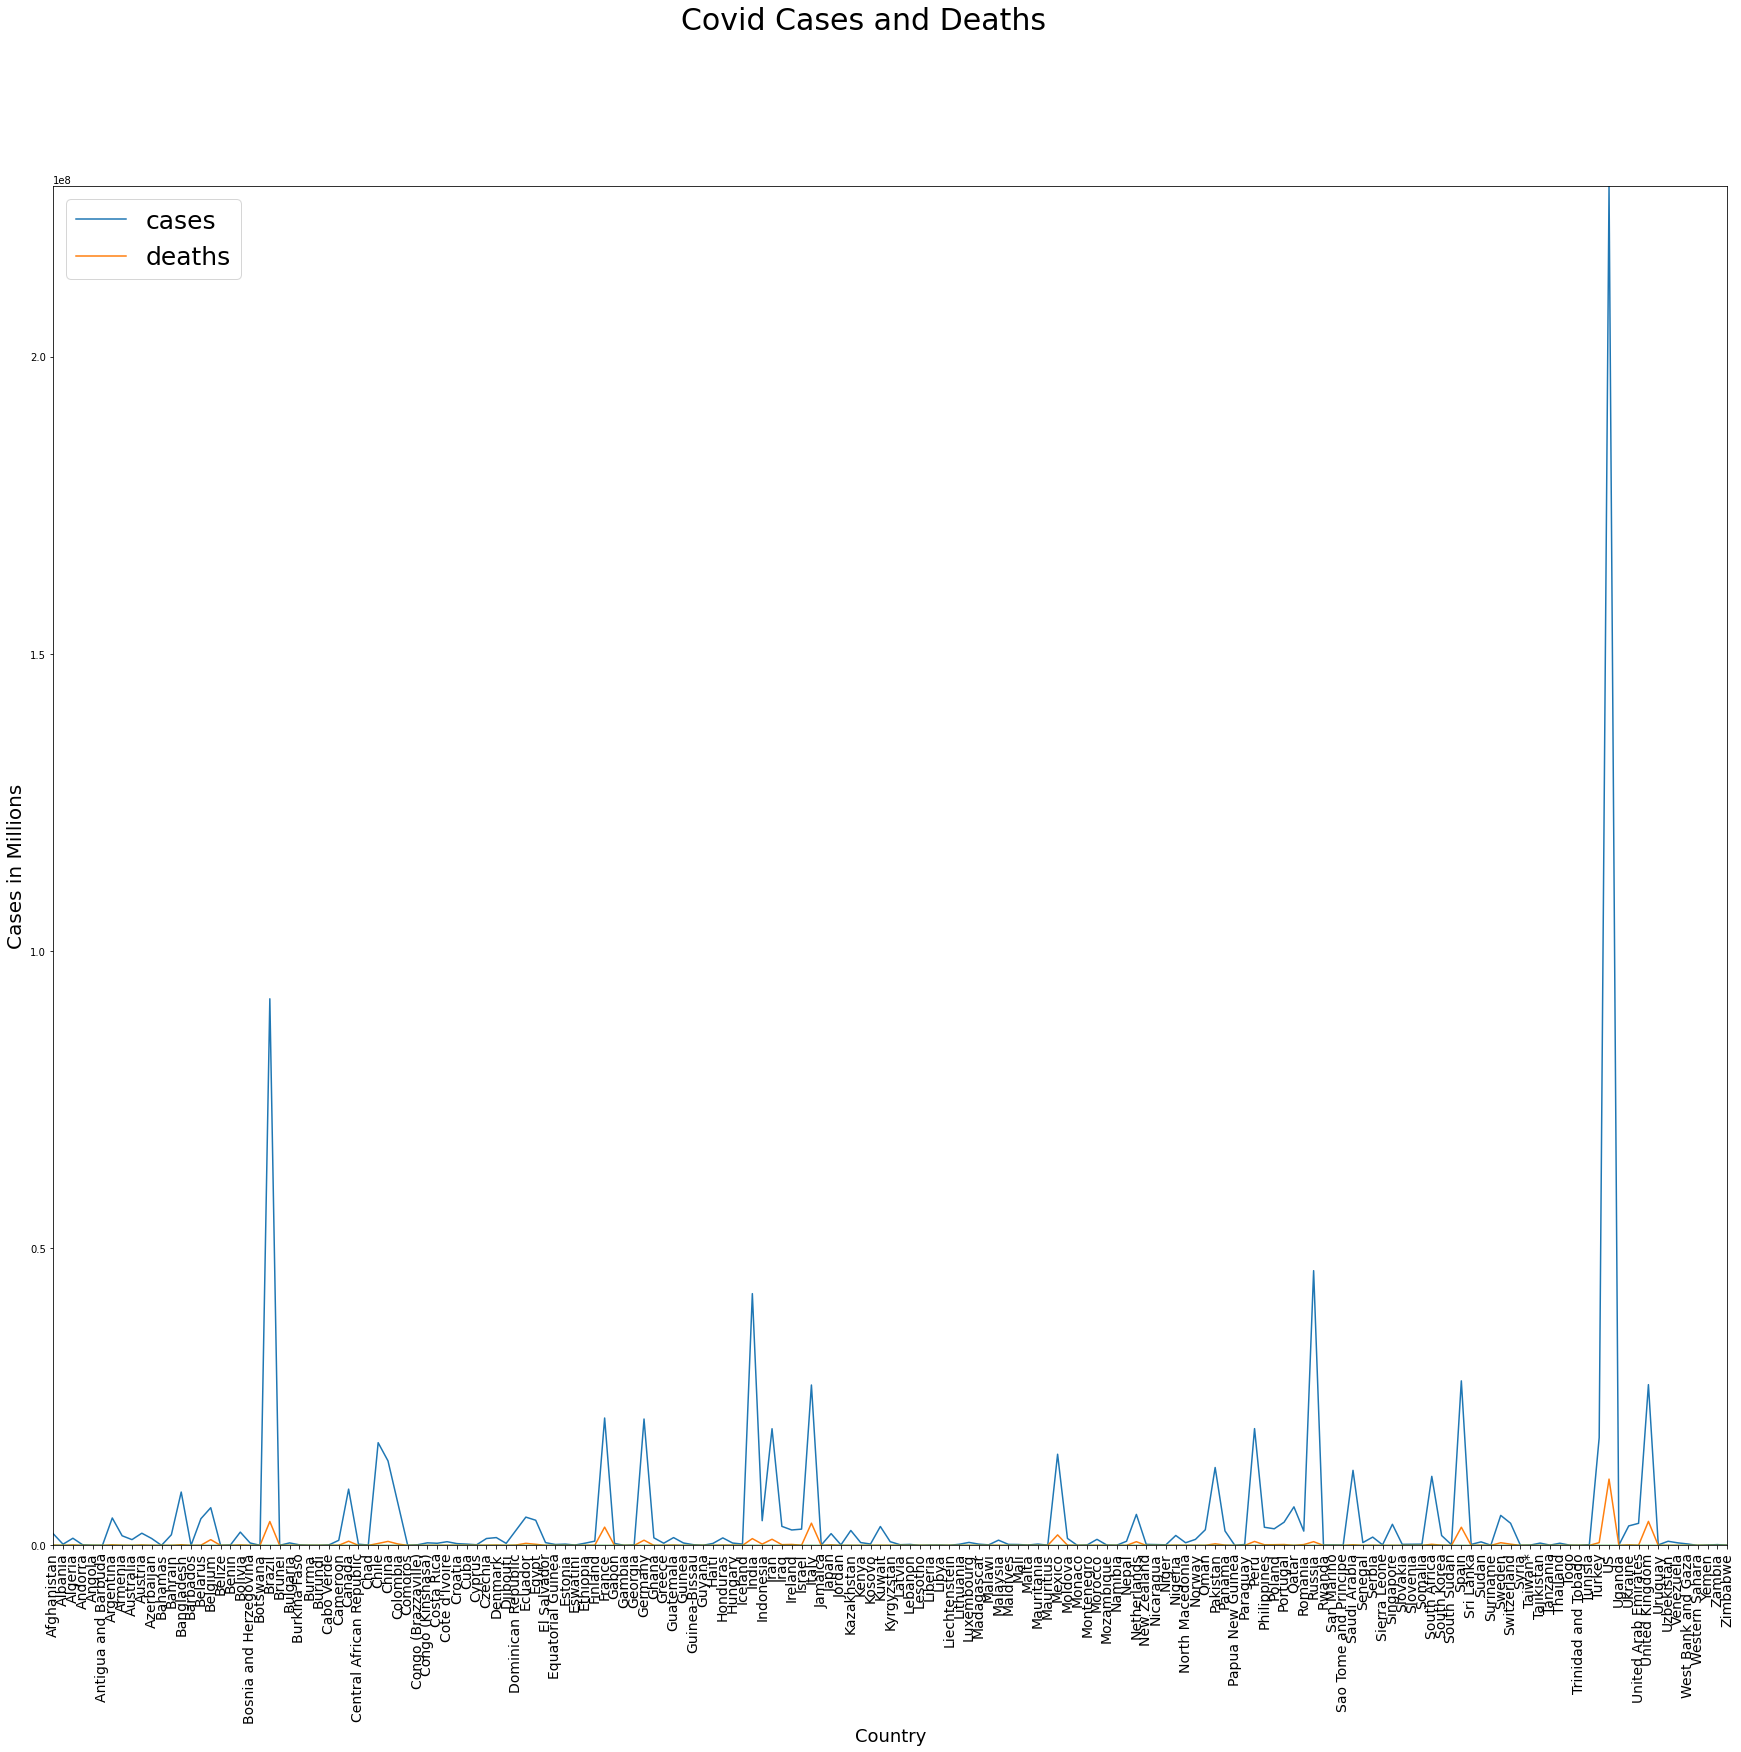

In [20]:
cases = []
deaths = []
country = []
percent = []

for i in range(0, len(covid["Country"])):
    if covid["Total Deaths"][i] > 0:
        # print('nope')
        country.append(covid["Country"][i])
        cases.append(covid["Total Cases"][i])
        deaths.append(covid["Total Deaths"][i])
        percent.append(covid["Percent of Deaths"][i])

country = sorted(country)

fig, ax = plt.subplots(1, 1, figsize=[30, 25])
fig.suptitle("Covid Cases and Deaths", fontsize=30)
plt.xlabel("Country", fontsize=18)
plt.ylabel("Cases in Millions", fontsize=20)
plt.xticks(rotation=90, fontsize=14)
plt.margins(x=0, y=0)
plt.plot(country, cases)
plt.plot(country, deaths)
plt.plot(country, percent)
plt.legend(["cases", "deaths"], fontsize=25)
plt.show()

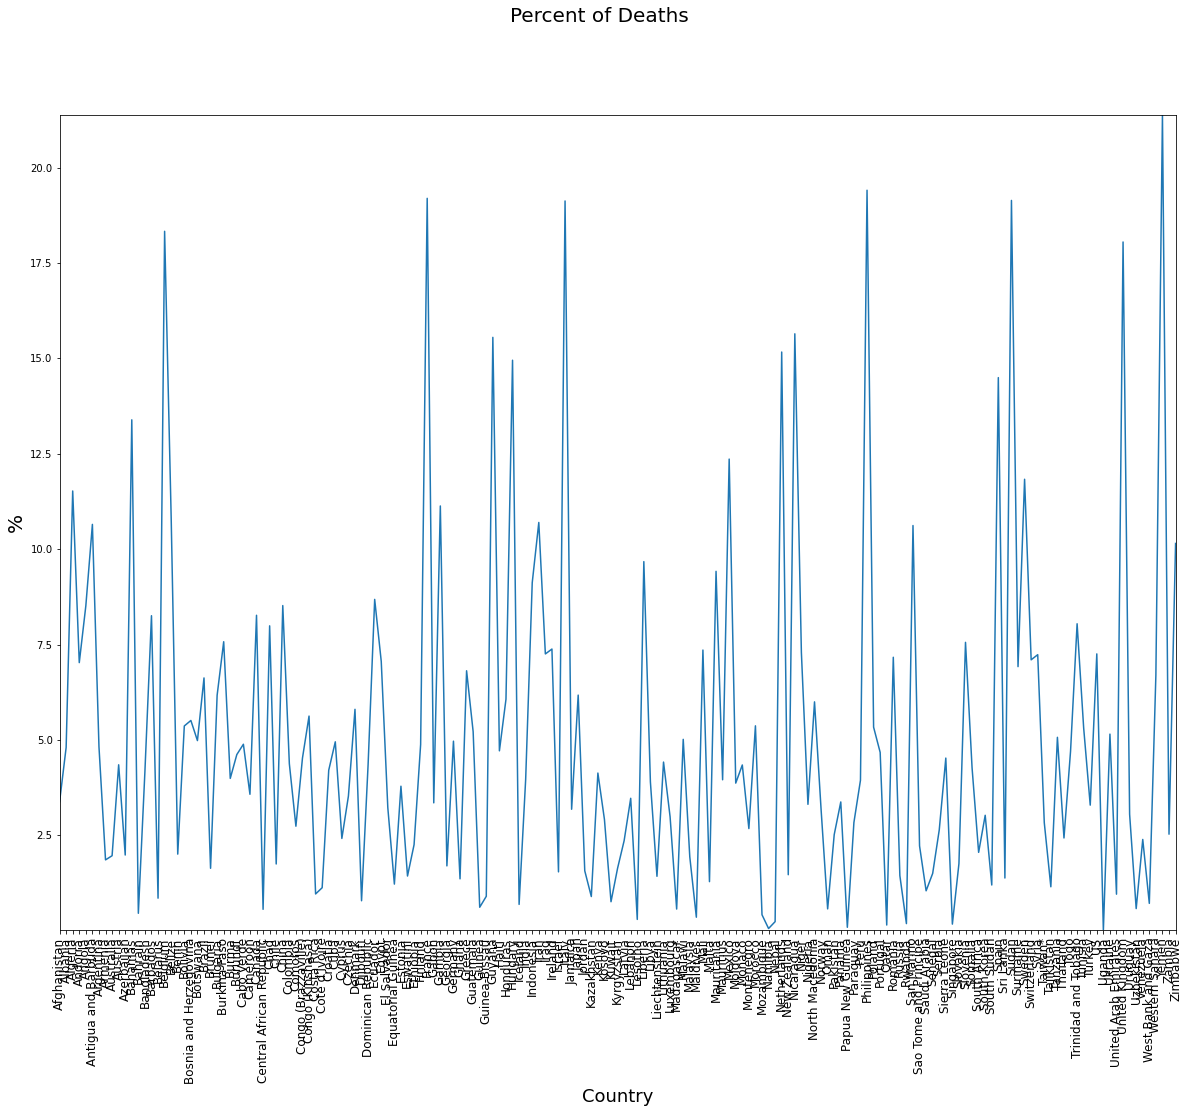

In [21]:
fig, ax = plt.subplots(1, 1, figsize=[20, 15])
fig.suptitle("Percent of Deaths", fontsize=20)
plt.xlabel("Country", fontsize=18)
plt.ylabel("%", fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.margins(x=0, y=0)
plt.plot(country, percent)

# Education vs Covid Pandemic

C:\Users\tiz081\AppData\Local\Temp/ipykernel_10896/834511723.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wb["mean"] = wb.mean(axis=1)


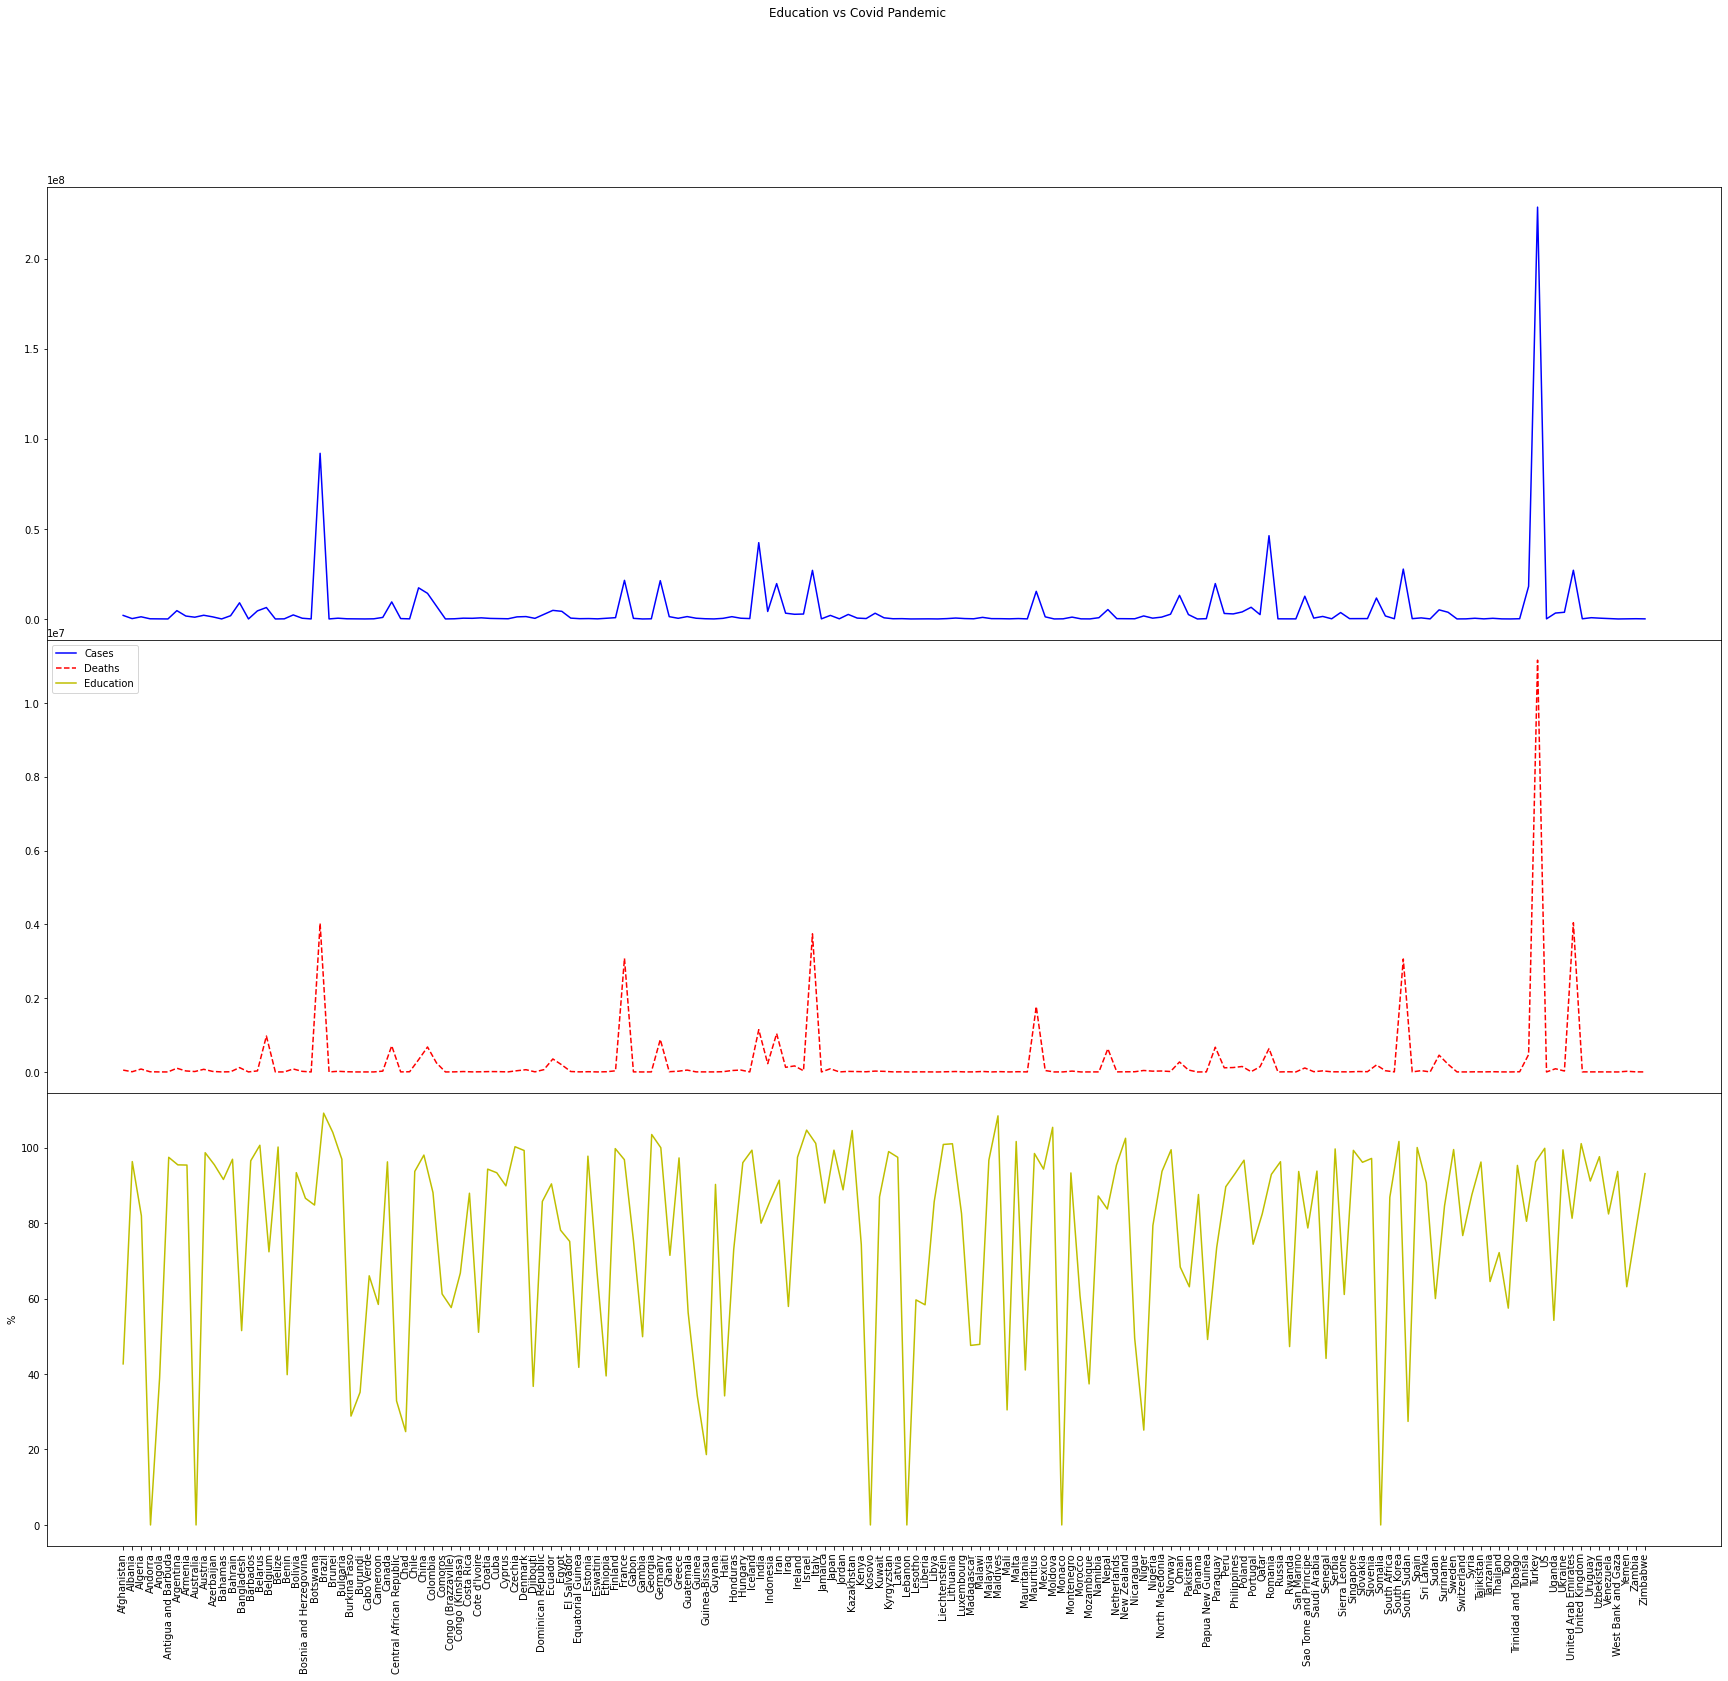

In [22]:
education_csv = "education.csv"
education = wb_clean(os.path.expanduser(education_csv))

drop = []
us = {"Brunei Darussalam": "Brunei", "Congo, Dem. Rep.": "Congo (Brazzaville)", "Bahamas, The": "Bahamas",
      "Congo, Rep.": "Congo (Kinshasa)", "Czech Republic": "Czechia", "Egypt, Arab Rep.": "Egypt",
      "Gambia, The": "Gambia", "Iran, Islamic Rep.": "Iran", "Kyrgyz Republic": "Kyrgyzstan",
      "Korea, Rep.": "South Korea", "Lao PDR": "Laos", "St. Lucia": "Saint Lucia", "Russian Federation": "Russia",
      "Slovak Republic": "Slovakia", "Syrian Arab Republic": "Syria",
      "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
      "Venezuela, RB": "Venezuela", "United States": "US", "Yemen, Rep.": "Yemen"}

education['Country'] = education['Country'].replace(us)
for idx, coun in enumerate(education["Country"]):
    if coun not in country:
        drop.append(idx)
    else:
        continue
keep = set(range(education.shape[0])) - set(drop)
covid_edu = education.take(list(keep))

covid_edu["mean"] = covid_edu["mean"].fillna(0)
covid_edu = covid_edu.sort_values("Country")
# print(list(covid_edu["Country"]))

#EDUCATION VS COVID
fig, axs = plt.subplots(3, figsize=[30, 25])
fig.suptitle("Education vs Covid Pandemic")
line0, = axs[0].plot(country, cases, color='b', linestyle='-')
line1, = axs[1].plot(country, deaths, color='r', linestyle='--')
line2, = axs[2].plot(list(covid_edu["Country"]), list(covid_edu["mean"]), color='y')
plt.xticks(rotation=90)
plt.setp(axs[0].get_xticklabels(), visible=False)
plt.setp(axs[1].get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)
axs[2].set_ylabel("%")
axs[1].legend((line0, line1, line2), ("Cases", "Deaths", "Education"), loc="upper left")
plt.show()

# GDP vs Covid Pandemic

In [23]:
education_csv = "GDP.csv"
education = wb_clean(os.path.expanduser(education_csv))

drop = []
us = {"Brunei Darussalam": "Brunei", "Congo, Dem. Rep.": "Congo (Brazzaville)", "Bahamas, The": "Bahamas",
      "Congo, Rep.": "Congo (Kinshasa)", "Czech Republic": "Czechia", "Egypt, Arab Rep.": "Egypt",
      "Gambia, The": "Gambia", "Iran, Islamic Rep.": "Iran", "Kyrgyz Republic": "Kyrgyzstan",
      "Korea, Rep.": "South Korea", "Lao PDR": "Laos", "St. Lucia": "Saint Lucia", "Russian Federation": "Russia",
      "Slovak Republic": "Slovakia", "Syrian Arab Republic": "Syria",
      "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
      "Venezuela, RB": "Venezuela", "United States": "US", "Yemen, Rep.": "Yemen"}

education['Country'] = education['Country'].replace(us)
for idx, coun in enumerate(education["Country"]):
    if coun not in country:
        drop.append(idx)
    else:
        continue
keep = set(range(education.shape[0])) - set(drop)
covid_edu = education.take(list(keep))

covid_edu["mean"] = covid_edu["mean"].fillna(0)
covid_edu = covid_edu.sort_values("Country")
# print(list(covid_edu["Country"]))

C:\Users\tiz081\AppData\Local\Temp/ipykernel_10896/834511723.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wb["mean"] = wb.mean(axis=1)


# Education vs Covid

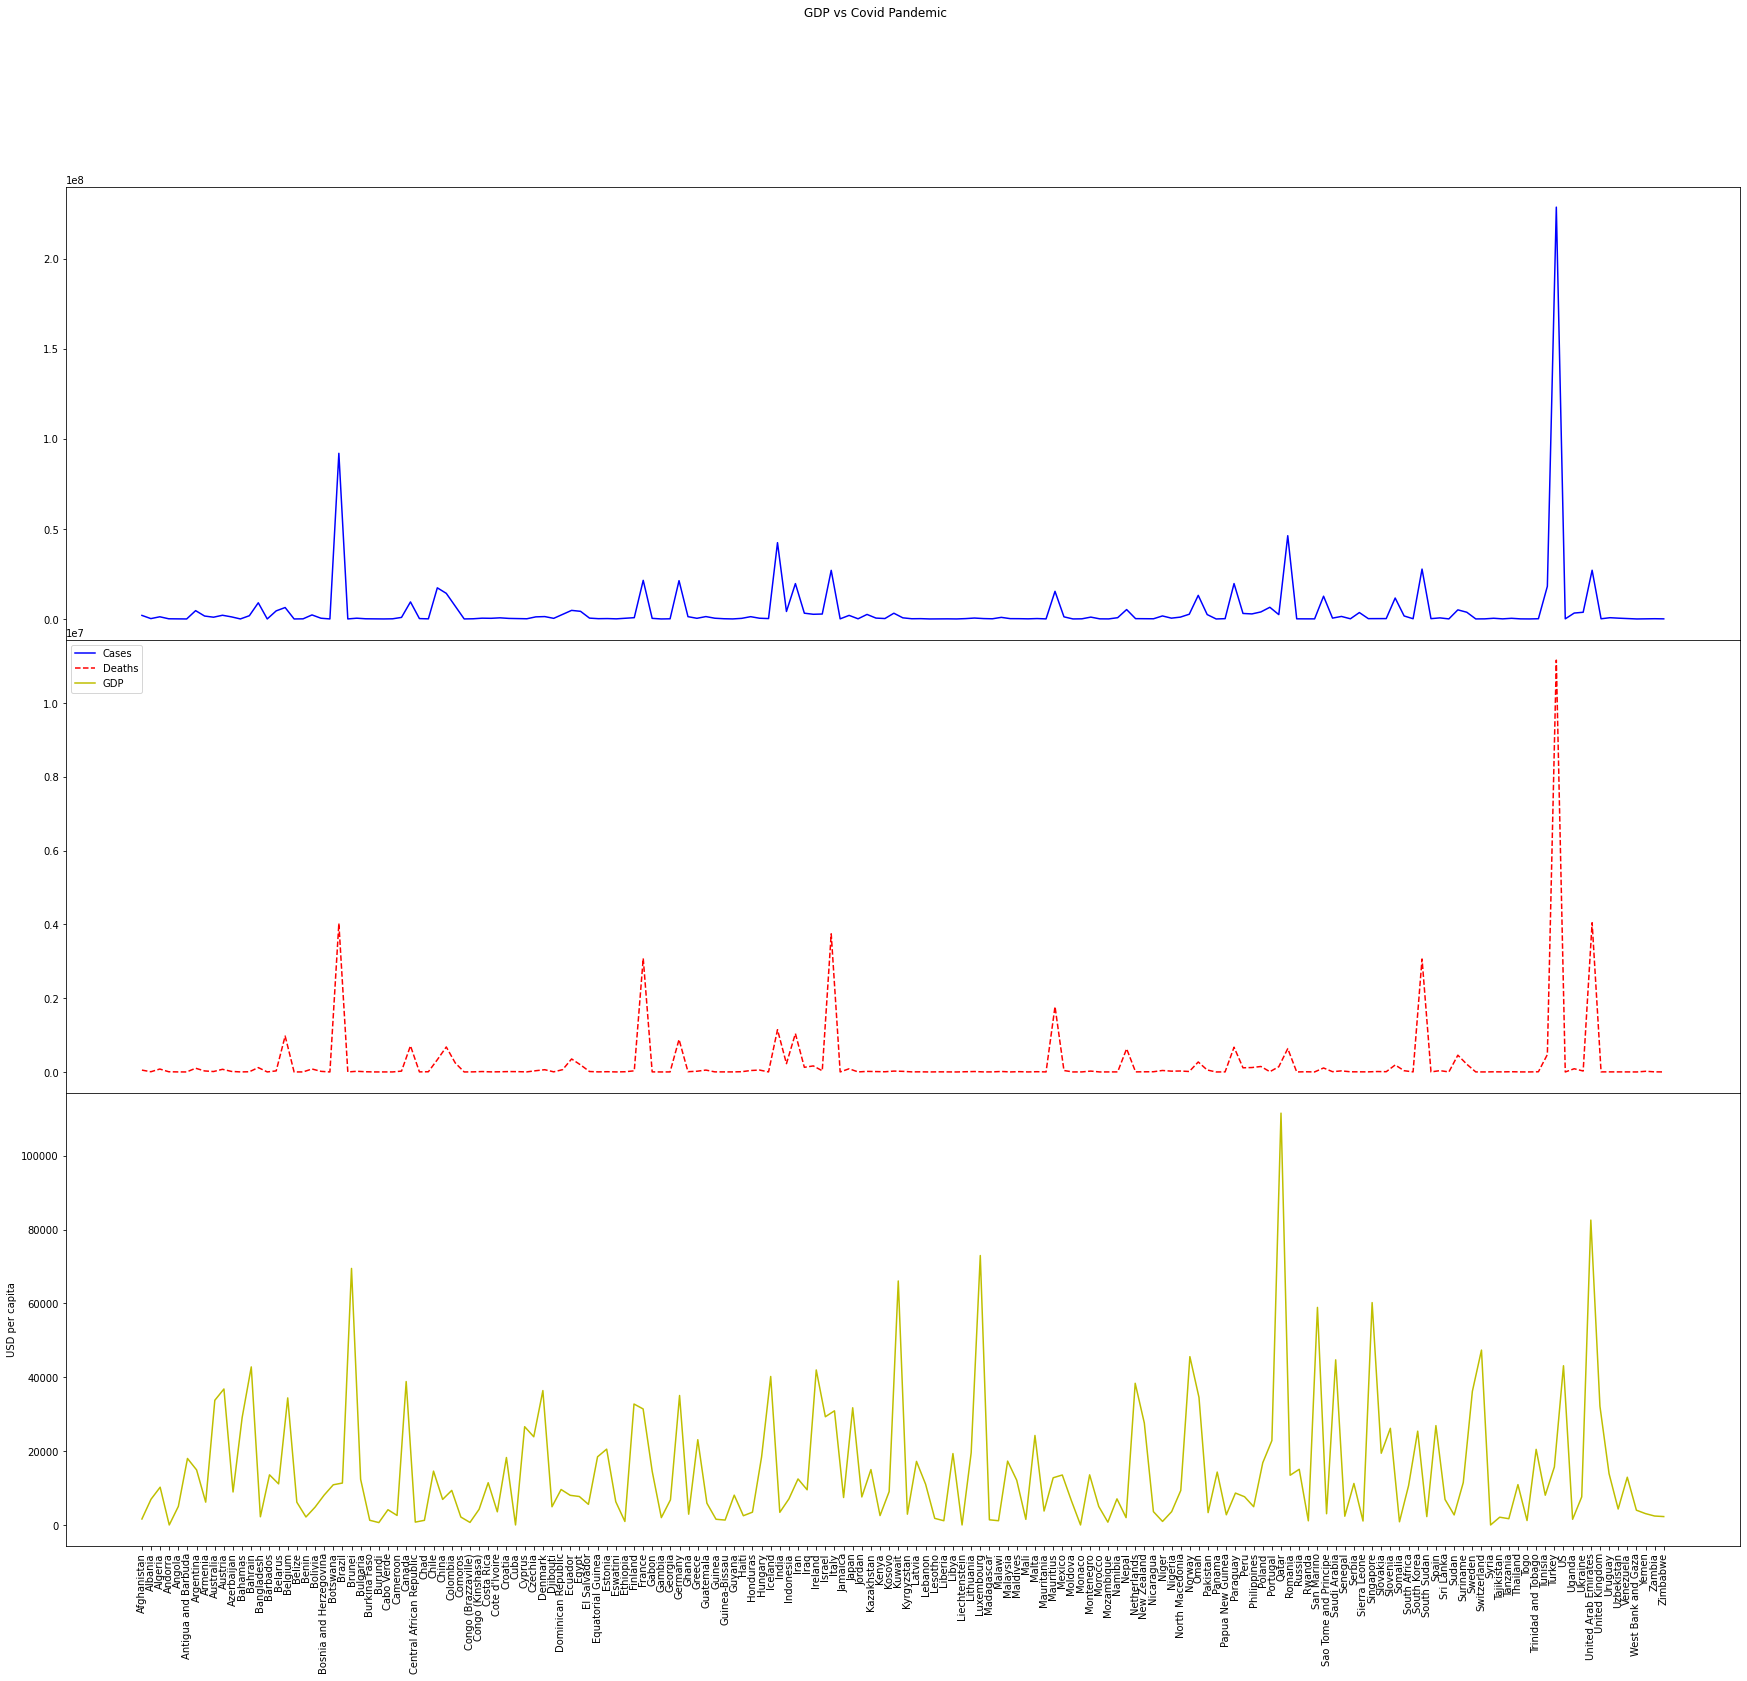

In [24]:
fig, axs = plt.subplots(3, figsize=[30, 25])
fig.suptitle("GDP vs Covid Pandemic")
line0, = axs[0].plot(country, cases, color='b', linestyle='-')
line1, = axs[1].plot(country, deaths, color='r', linestyle='--')
line2, = axs[2].plot(list(covid_edu["Country"]), list(covid_edu["mean"]), color='y')
plt.xticks(rotation=90)
plt.setp(axs[0].get_xticklabels(), visible=False)
plt.setp(axs[1].get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)
axs[2].set_ylabel("USD per capita")
axs[1].legend((line0, line1, line2), ("Cases", "Deaths", "GDP"), loc="upper left")
plt.show()

# malnutrition vs Covid Pandemic

In [25]:
education_csv = "malnutrition.csv"
education = wb_clean(os.path.expanduser(education_csv))

drop = []
us = {"Brunei Darussalam": "Brunei", "Congo, Dem. Rep.": "Congo (Brazzaville)", "Bahamas, The": "Bahamas",
      "Congo, Rep.": "Congo (Kinshasa)", "Czech Republic": "Czechia", "Egypt, Arab Rep.": "Egypt",
      "Gambia, The": "Gambia", "Iran, Islamic Rep.": "Iran", "Kyrgyz Republic": "Kyrgyzstan",
      "Korea, Rep.": "South Korea", "Lao PDR": "Laos", "St. Lucia": "Saint Lucia", "Russian Federation": "Russia",
      "Slovak Republic": "Slovakia", "Syrian Arab Republic": "Syria",
      "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
      "Venezuela, RB": "Venezuela", "United States": "US", "Yemen, Rep.": "Yemen"}

education['Country'] = education['Country'].replace(us)
for idx, coun in enumerate(education["Country"]):
    if coun not in country:
        drop.append(idx)
    else:
        continue
keep = set(range(education.shape[0])) - set(drop)
covid_edu = education.take(list(keep))

covid_edu["mean"] = covid_edu["mean"].fillna(0)
covid_edu = covid_edu.sort_values("Country")
# print(list(covid_edu["Country"]))

C:\Users\tiz081\AppData\Local\Temp/ipykernel_10896/834511723.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wb["mean"] = wb.mean(axis=1)


# Education vs Covid

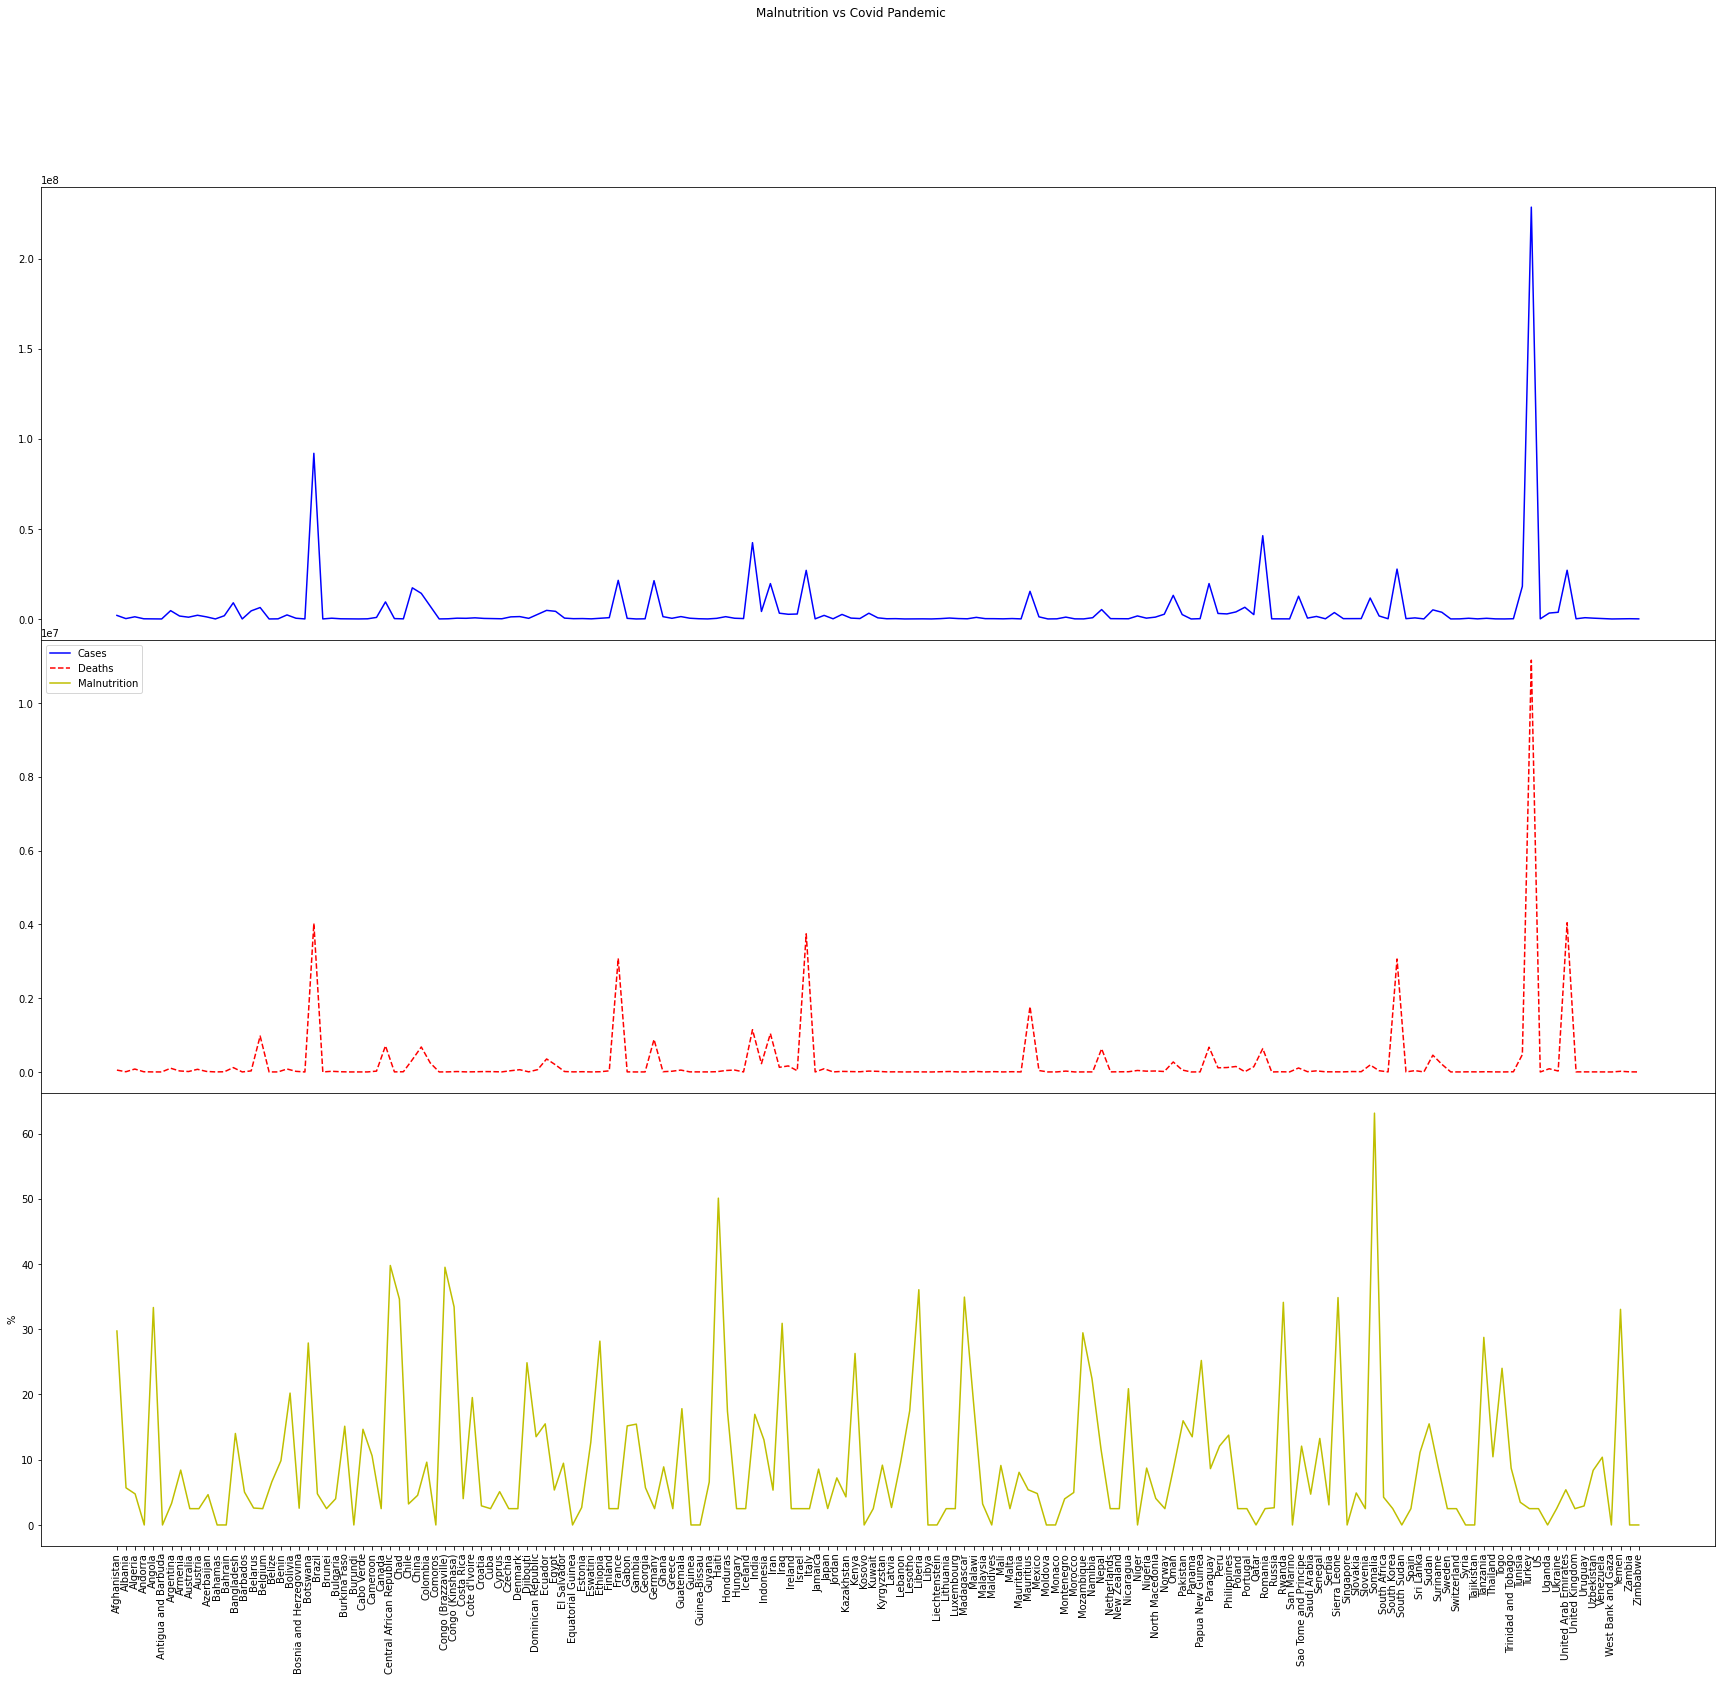

In [26]:
fig, axs = plt.subplots(3, figsize=[30, 25])
fig.suptitle("Malnutrition vs Covid Pandemic")
line0, = axs[0].plot(country, cases, color='b', linestyle='-')
line1, = axs[1].plot(country, deaths, color='r', linestyle='--')
line2, = axs[2].plot(list(covid_edu["Country"]), list(covid_edu["mean"]), color='y')
plt.xticks(rotation=90)
plt.setp(axs[0].get_xticklabels(), visible=False)
plt.setp(axs[1].get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)
axs[2].set_ylabel("%")
axs[1].legend((line0, line1, line2), ("Cases", "Deaths", "Malnutrition"), loc="upper left")
plt.show()

# poverty vs Covid Pandemic

C:\Users\tiz081\AppData\Local\Temp/ipykernel_10896/834511723.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wb["mean"] = wb.mean(axis=1)


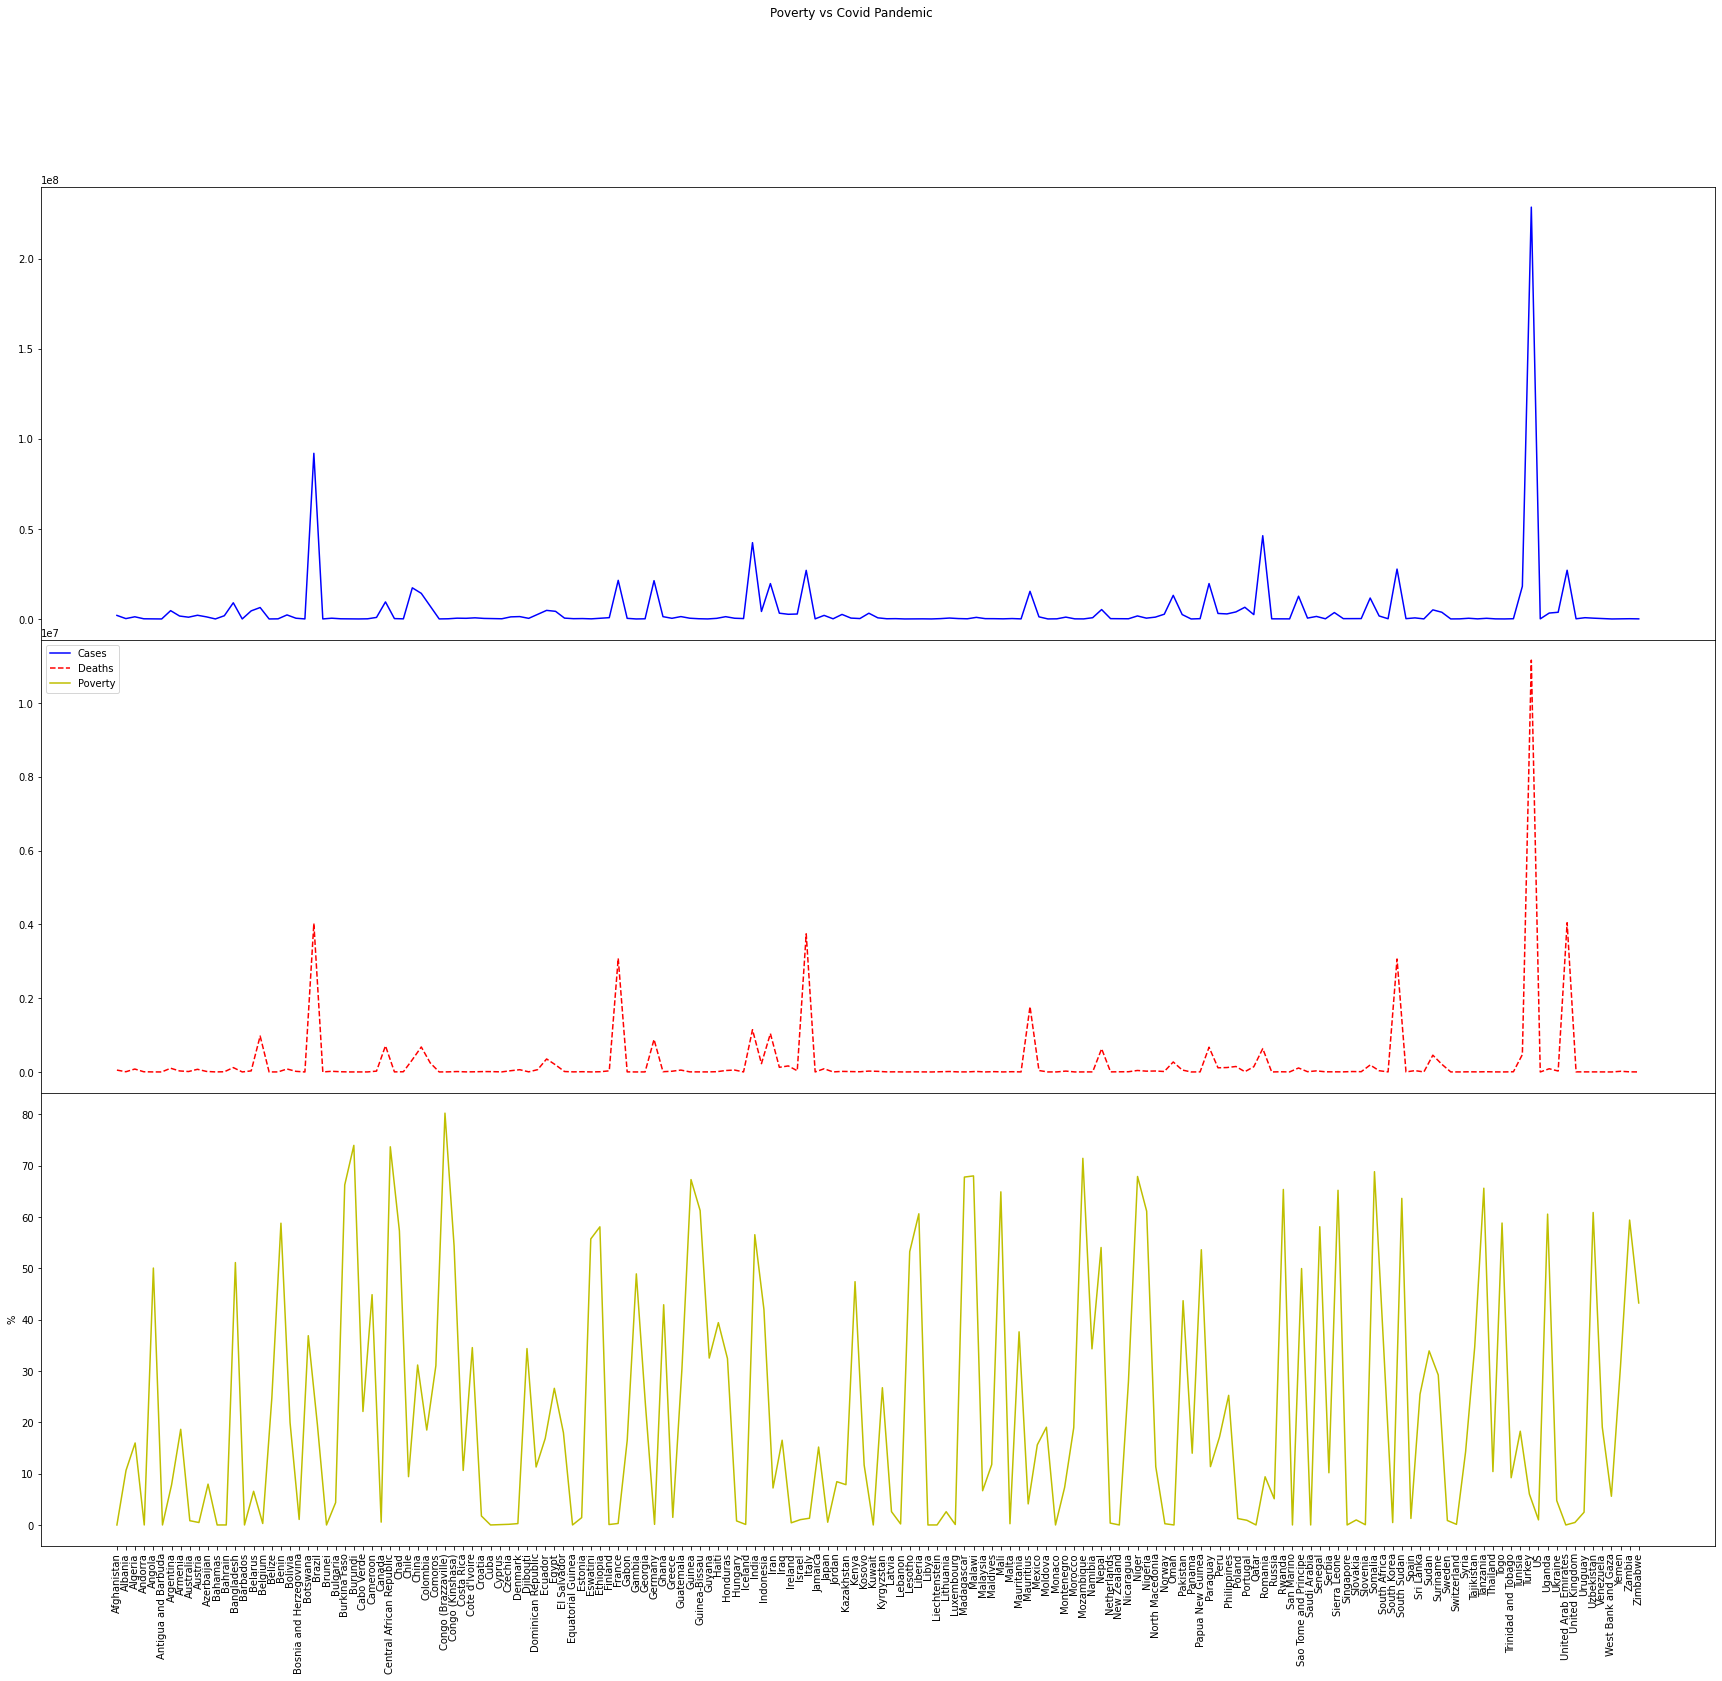

In [27]:
education_csv = "poverty.csv"
education = wb_clean(os.path.expanduser(education_csv))

drop = []
us = {"Brunei Darussalam": "Brunei", "Congo, Dem. Rep.": "Congo (Brazzaville)", "Bahamas, The": "Bahamas",
      "Congo, Rep.": "Congo (Kinshasa)", "Czech Republic": "Czechia", "Egypt, Arab Rep.": "Egypt",
      "Gambia, The": "Gambia", "Iran, Islamic Rep.": "Iran", "Kyrgyz Republic": "Kyrgyzstan",
      "Korea, Rep.": "South Korea", "Lao PDR": "Laos", "St. Lucia": "Saint Lucia", "Russian Federation": "Russia",
      "Slovak Republic": "Slovakia", "Syrian Arab Republic": "Syria",
      "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
      "Venezuela, RB": "Venezuela", "United States": "US", "Yemen, Rep.": "Yemen"}

education['Country'] = education['Country'].replace(us)
for idx, coun in enumerate(education["Country"]):
    if coun not in country:
        drop.append(idx)
    else:
        continue
keep = set(range(education.shape[0])) - set(drop)
covid_edu = education.take(list(keep))

covid_edu["mean"] = covid_edu["mean"].fillna(0)
covid_edu = covid_edu.sort_values("Country")
# print(list(covid_edu["Country"]))

#EDUCATION VS COVID
fig, axs = plt.subplots(3, figsize=[30, 25])
fig.suptitle("Poverty vs Covid Pandemic")
line0, = axs[0].plot(country, cases, color='b', linestyle='-')
line1, = axs[1].plot(country, deaths, color='r', linestyle='--')
line2, = axs[2].plot(list(covid_edu["Country"]), list(covid_edu["mean"]), color='y')
plt.xticks(rotation=90)
plt.setp(axs[0].get_xticklabels(), visible=False)
plt.setp(axs[1].get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)
axs[2].set_ylabel("%")
axs[1].legend((line0, line1, line2), ("Cases", "Deaths", "Poverty"), loc="upper left")
plt.show()

Read in the data containing death numbers per country

In [28]:
hiv_aids_df = pd.read_csv('data/hiv_aids_data/hiv_aids_death_data.csv')

Lets check out the first few rows to get a feel for how the data looks

In [30]:
hiv_aids_df.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,HIV_0000000006,Number of deaths due to HIV/AIDS,numeric,EUR,Europe,Country,ALB,Albania,Year,2020,...,NaN,<,100.0,<,100.0,<100 [<100 – <100],NaN,NaN,EN,2021-10-11 00:00:00
1,HIV_0000000006,Number of deaths due to HIV/AIDS,numeric,EUR,Europe,Country,ARM,Armenia,Year,2020,...,NaN,<,100.0,<,100.0,<100 [<100 – <100],NaN,NaN,EN,2021-10-11 00:00:00
2,HIV_0000000006,Number of deaths due to HIV/AIDS,numeric,WPR,Western Pacific,Country,AUS,Australia,Year,2020,...,NaN,<,100.0,<,100.0,<100 [<100 – <100],NaN,NaN,EN,2021-10-11 00:00:00
3,HIV_0000000006,Number of deaths due to HIV/AIDS,numeric,AFR,Africa,Country,CPV,Cabo Verde,Year,2020,...,NaN,<,100.0,<,100.0,<100 [<100 – <100],NaN,NaN,EN,2021-10-11 00:00:00
4,HIV_0000000006,Number of deaths due to HIV/AIDS,numeric,AFR,Africa,Country,COM,Comoros,Year,2020,...,NaN,<,100.0,<,100.0,<100 [<100 – <100],NaN,NaN,EN,2021-10-11 00:00:00


Looking more closely at the data locally as a csv a lot of these columns have no values. Lets drop all the columns with no values

In [35]:
hiv_aids_df.dropna(axis=1, how='all', inplace=True)
hiv_aids_df.columns

Index(['Indicator', 'SpatialDimValueCode', 'Location', 'Period',
       'FactValueNumeric', 'FactValueNumericLow'],
      dtype='object')

The IndicatorCode, ValueType, ParentsLocationCode,ParentLocation,LocationType,Period type,IsLastYear,Language will all be useless dropping them

In [32]:
hiv_aids_df.drop(
    columns=['IndicatorCode', 'ValueType', 'ParentLocationCode', 'ParentLocation', 'Location type', 'Period type',
             'IsLatestYear', 'Language', 'DateModified', 'FactValueTranslationID', 'FactValueNumericPrefix',
             'FactValueNumericLowPrefix', 'FactValueNumericLowPrefix', 'FactValueNumericHighPrefix',
             'FactValueNumericHigh', 'Value'], axis=1, inplace=True)

There is still missing data for the value which is the most important column for analysis, dropping all the rows where the value is missing.

In [37]:
hiv_aids_df.dropna(subset=["FactValueNumeric"], axis=0, inplace=True)
hiv_aids_df

,Indicator,SpatialDimValueCode,Location,Period,FactValueNumeric,FactValueNumericLow
0,Number of deaths due to HIV/AIDS,ALB,Albania,2020,100.0,100.0
1,Number of deaths due to HIV/AIDS,ARM,Armenia,2020,100.0,100.0
2,Number of deaths due to HIV/AIDS,AUS,Australia,2020,100.0,100.0
3,Number of deaths due to HIV/AIDS,CPV,Cabo Verde,2020,100.0,100.0
4,Number of deaths due to HIV/AIDS,COM,Comoros,2020,100.0,100.0
...,...,...,...,...,...,...
3565,Number of deaths due to HIV/AIDS,NAM,Namibia,2000,7600.0,7000.0
3566,Number of deaths due to HIV/AIDS,MLI,Mali,2000,8600.0,6200.0
3567,Number of deaths due to HIV/AIDS,TZA,United Republic of Tanzania,2000,86000.0,78000.0
3568,Number of deaths due to HIV/AIDS,UGA,Uganda,2000,89000.0,82000.0


After getting rid of all of those values there are only 131 countries

In [38]:
print(hiv_aids_df.Location.unique())
len(hiv_aids_df.Location.unique())

['Albania' 'Armenia' 'Australia' 'Cabo Verde' 'Comoros' 'Croatia'
 'Denmark' 'Estonia' 'Fiji' 'Georgia' 'Greece' 'Iceland' 'Ireland' 'Japan'
 'Jordan' 'Lebanon' 'Libya' 'Mongolia' 'New Zealand' 'Norway' 'Qatar'
 'Sao Tome and Principe' 'Serbia' 'Singapore' 'Syrian Arab Republic'
 'Timor-Leste' 'United Arab Emirates' 'Bhutan' 'Kyrgyzstan' 'Netherlands'
 'Montenegro' 'Azerbaijan' 'Guyana' 'Saudi Arabia' 'Sri Lanka' 'Suriname'
 'Uruguay' 'Belize' 'Switzerland' 'Tunisia' 'Algeria' 'Belarus'
 'Bolivia (Plurinational State of)' 'Trinidad and Tobago' 'Kazakhstan'
 'Nicaragua' 'Romania' 'Eritrea' 'Djibouti' 'Costa Rica' 'Egypt'
 "Lao People's Democratic Republic" 'Portugal' 'Tajikistan' 'Yemen'
 'Morocco' 'Somalia' 'Panama' 'Republic of Moldova' 'Cuba' 'Mauritania'
 'Paraguay' 'Germany' 'Papua New Guinea' 'Ecuador' 'Niger' 'Senegal'
 'Cambodia' 'Liberia' 'Gambia' 'Argentina' 'Guinea-Bissau' 'Burundi'
 'Madagascar' 'Dominican Republic' 'Malawi' 'Thailand' 'Ghana' 'Brazil'
 'Ethiopia' 'Cameroon'

131

Lets write the finished dataset to a csv

# Swine Epidemic plot cases and deaths

In [39]:
def clean_plot(world_bank_data_set, countries_to_rename, suptitle, country, cases, deaths):
    '''
    :param data_set:
        education, GDP, malnutrition, poverty

    :param countries_to_rename:
        dict of countries to rename
    :param suptitle:
        title the graph for, ex: Education vs Swine Flu Epidemic
    :return:
        none
    '''

    world_bank_data_set_csv = f"{world_bank_data_set}.csv"
    world_bank_df = wb_clean(os.path.expanduser(world_bank_data_set_csv))

    drop = []
    us = countries_to_rename
    world_bank_df['Country'] = world_bank_df['Country'].replace(us)
    for idx, coun in enumerate(world_bank_df["Country"]):
        if coun not in country:
            drop.append(idx)
        else:
            continue
    keep = set(range(world_bank_df.shape[0])) - set(drop)
    merged_df = world_bank_df.take(list(keep))
    # swine_edu = swine.merge(education, on = "Country", how = 'left')
    merged_df["mean"] = merged_df["mean"].fillna(0)
    merged_df = merged_df.sort_values("Country")

    #EDUCATION VS SWINE
    fig, axs = plt.subplots(3)
    fig.suptitle(suptitle)
    line0, = axs[0].plot(country, cases, color='b', linestyle='-')
    line1, = axs[1].plot(country, deaths, color='r', linestyle='--')
    line2, = axs[2].plot(country, list(merged_df["mean"]), color='y')
    plt.xticks(rotation=90)
    plt.setp(axs[0].get_xticklabels(), visible=False)
    plt.setp(axs[1].get_xticklabels(), visible=False)
    plt.subplots_adjust(hspace=.0)
    axs[2].set_ylabel("%")
    axs[1].legend((line0, line1, line2), ("Cases", "Deaths", f"{world_bank_data_set}".capitalize()), loc="upper left")
    plt.show()

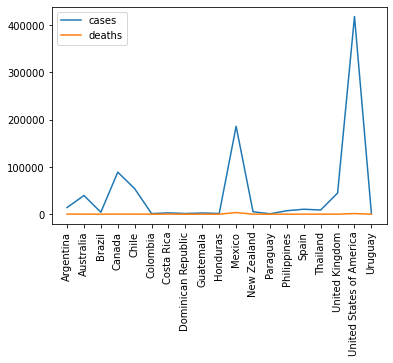

C:\Users\tiz081\AppData\Local\Temp/ipykernel_10896/834511723.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wb["mean"] = wb.mean(axis=1)


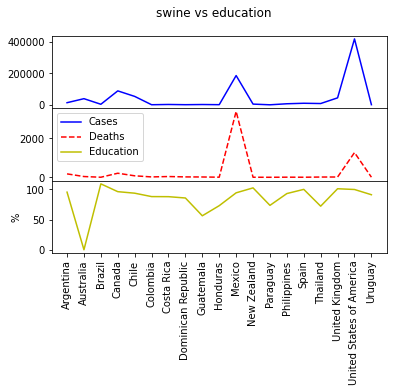

In [41]:
cases = []
deaths = []
country = []
country_renames_swine = {"United States": "United States of America"}

for i in range(0, len(swine["Country"])):
    if swine["Cumulative no. of deaths"][i] > 0:
        # print('nope')
        country.append(swine["Country"][i])
        cases.append(swine["Cumulative no. of cases"][i])
        deaths.append(swine["Cumulative no. of deaths"][i])

country = sorted(country)

plt.xticks(rotation=90)
plt.plot(country, cases)
plt.plot(country, deaths)
plt.legend(["cases", "deaths"])
plt.show()

clean_plot('education', country_renames_swine, "swine vs education", country, cases, deaths)

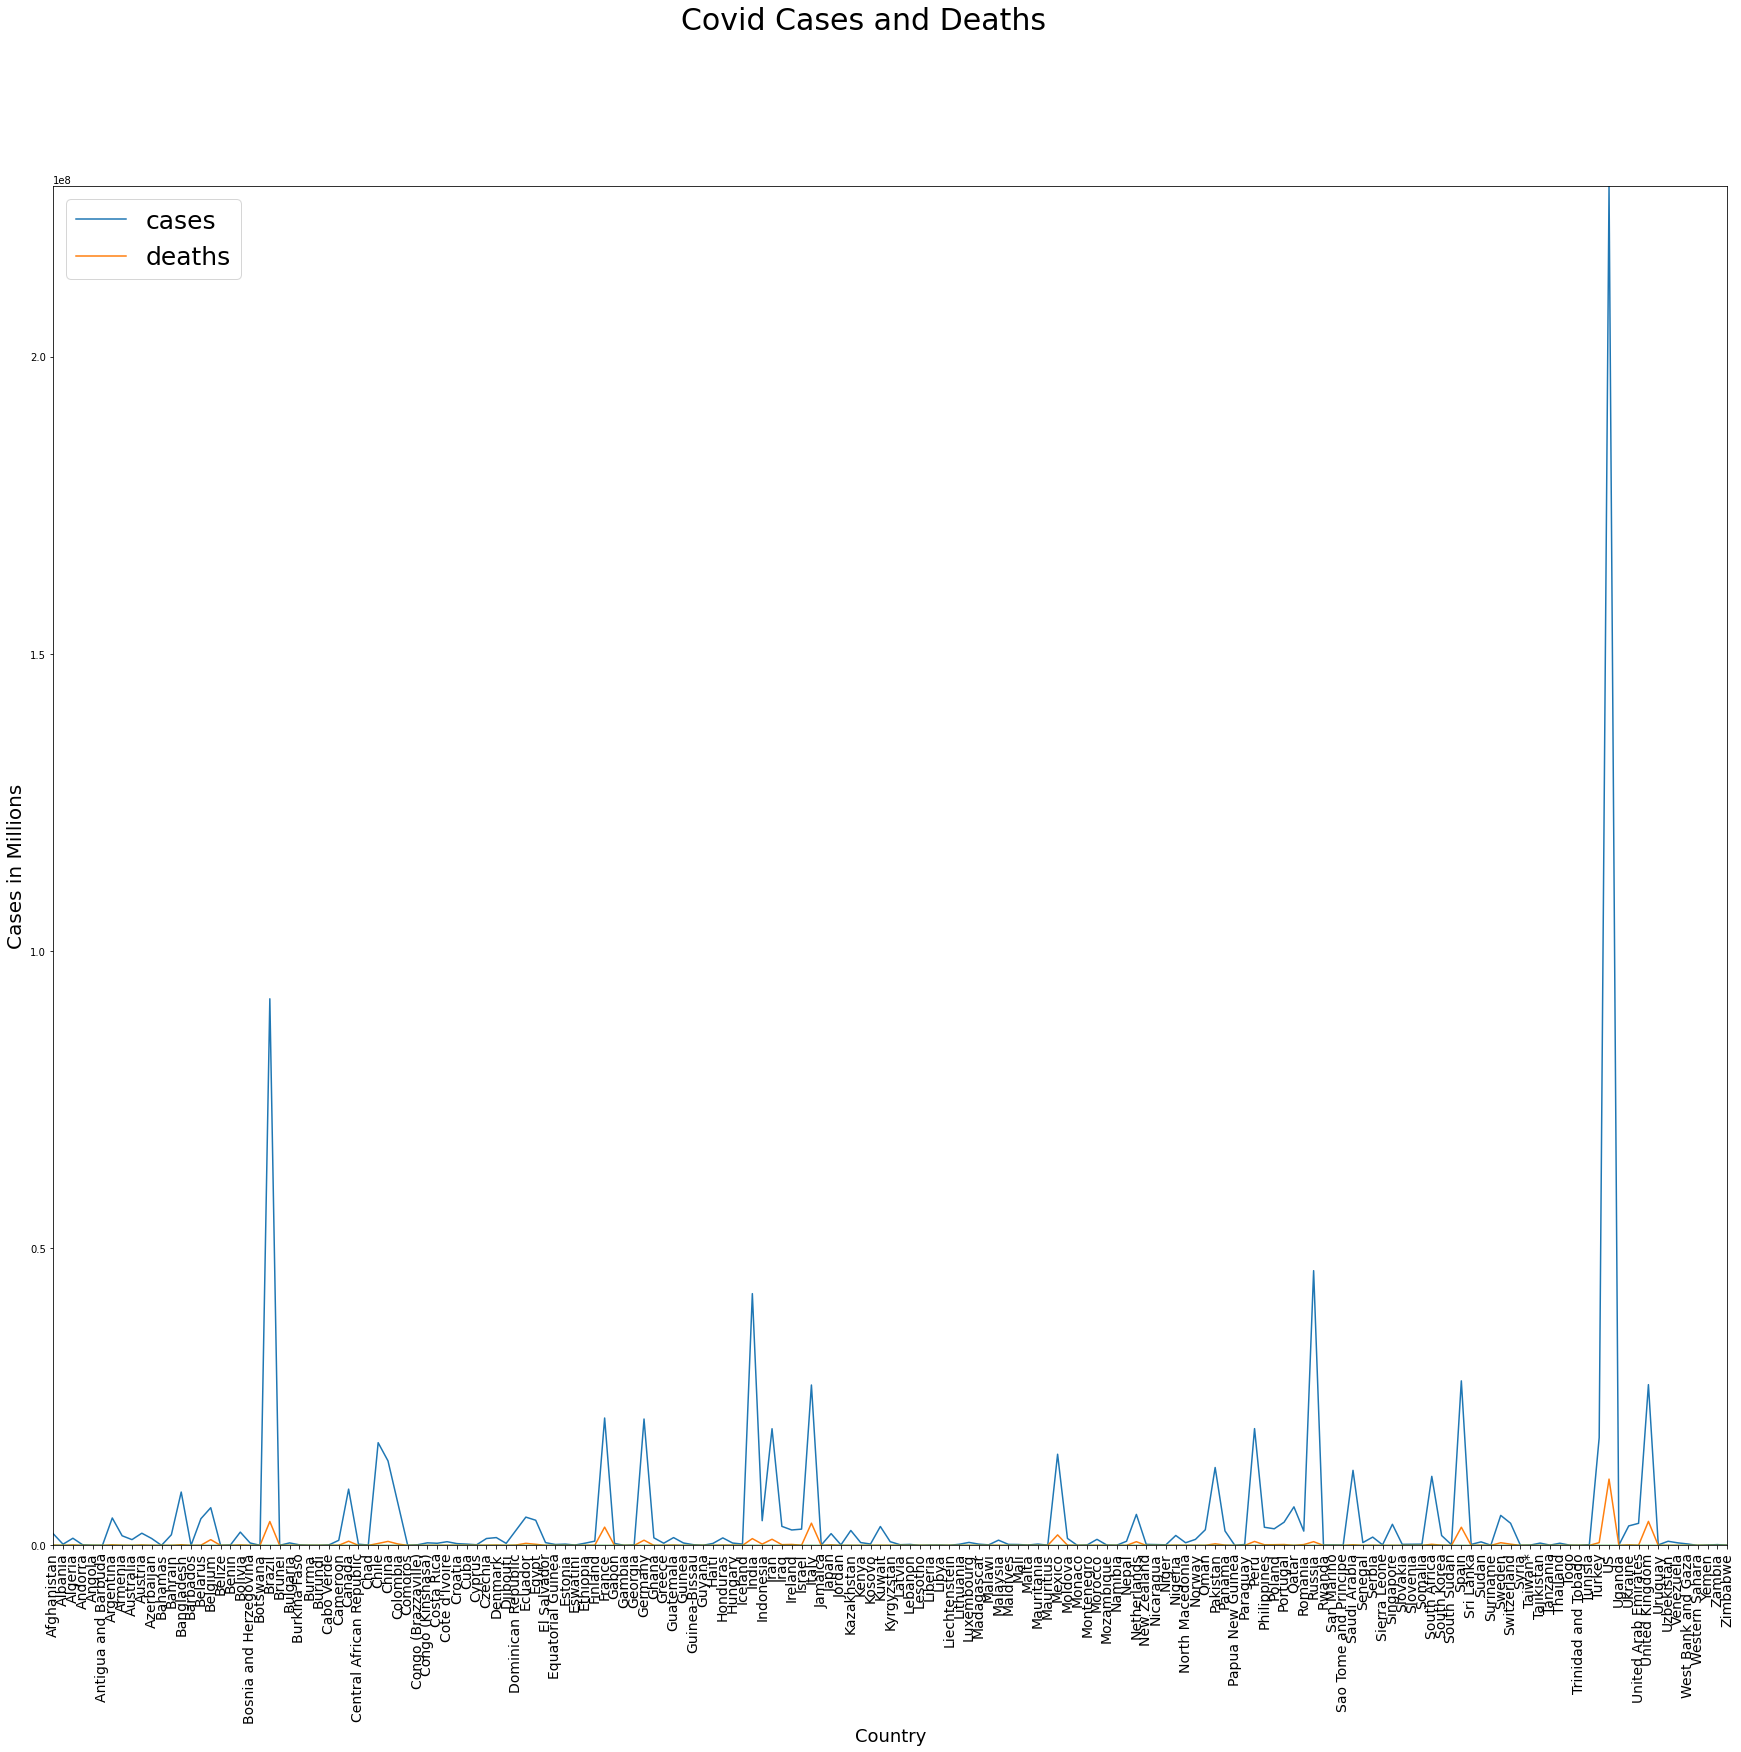

In [42]:
# Covid Pandemic plot cases and deaths
cases = []
deaths = []
country = []
percent = []
country_renames_covid = {"Brunei Darussalam": "Brunei", "Congo, Dem. Rep.": "Congo (Brazzaville)",
                         "Bahamas, The": "Bahamas",
                         "Congo, Rep.": "Congo (Kinshasa)", "Czech Republic": "Czechia", "Egypt, Arab Rep.": "Egypt",
                         "Gambia, The": "Gambia", "Iran, Islamic Rep.": "Iran", "Kyrgyz Republic": "Kyrgyzstan",
                         "Korea, Rep.": "South Korea", "Lao PDR": "Laos", "St. Lucia": "Saint Lucia",
                         "Russian Federation": "Russia",
                         "Slovak Republic": "Slovakia", "Syrian Arab Republic": "Syria",
                         "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
                         "Venezuela, RB": "Venezuela", "United States": "US", "Yemen, Rep.": "Yemen"}

for i in range(0, len(covid["Country"])):
    if covid["Total Deaths"][i] > 0:
        # print('nope')
        country.append(covid["Country"][i])
        cases.append(covid["Total Cases"][i])
        deaths.append(covid["Total Deaths"][i])
        percent.append(covid["Percent of Deaths"][i])

country = sorted(country)

fig, ax = plt.subplots(1, 1, figsize=[30, 25])
fig.suptitle("Covid Cases and Deaths", fontsize=30)
plt.xlabel("Country", fontsize=18)
plt.ylabel("Cases in Millions", fontsize=20)
plt.xticks(rotation=90, fontsize=14)
plt.margins(x=0, y=0)
plt.plot(country, cases)
plt.plot(country, deaths)
plt.plot(country, percent)
plt.legend(["cases", "deaths"], fontsize=25)
plt.show()

# clean_plot(world_bank_data_set, country_renames, suptitle, country, cases, deaths)